In [1]:
%matplotlib inline

import json

from lxml import html
#from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

chartinfo = 'Author: Meghan Miller | Data: Volcano World - volcano.oregonstate.edu'

In [2]:
pdurl ='http://volcano.oregonstate.edu/oldroot/volcanoes/alpha.html'
xpath = '//table'
tree = html.parse(pdurl)
tables = tree.xpath(xpath)

table_dfs = []
for idx in range(4, len(tables)):
    df = pd.read_html(html.tostring(tables[idx]), header=0)[0]
    table_dfs.append(df)

In [3]:
df_volc = pd.concat(table_dfs, ignore_index=True)

In [4]:
def cleanup_type(s):
    if not isinstance(s, str):
        return s
    s = s.replace('?', '').replace('  ', ' ')
    s = s.replace('volcanoes', 'volcano')
    s = s.replace('volcanoe', 'Volcano')
    s = s.replace('cones', 'cone')
    s = s.replace('Calderas', 'Caldera')
    return s.strip().title()

df_volc['Type'] = df_volc['Type'].map(cleanup_type)
df_volc['Type'].value_counts()

Stratovolcano         713
Shield Volcano        173
Submarine Volcano     137
Volcanic Field         98
Caldera                87
Cinder Cone            84
Complex Volcano        56
Pyroclastic Cone       43
Lava Domes             31
Fissure Vents          18
Tuff Cone              14
Maars                  12
Compound Volcano       11
Lava Dome              10
Scoria Cone             8
Pyroclastic Shield      8
Maar                    7
Subglacial Volcano      6
Unknown                 6
Somma Volcano           6
Crater Rows             5
Lava Cone               5
Pumice Cone             3
Fumarole Field          3
Explosion Craters       2
Volcanic Complex        2
Fissure Vent            2
Cones                   1
Volcanic Landform       1
Island Arc              1
Flood Basalts           1
Flood Basalt            1
Cone                    1
Lava Field              1
Tuff Rings              1
Hydrothermal Field      1
Name: Type, dtype: int64

In [5]:
df_volc.dropna(inplace=True)
len(df_volc)

1513

In [6]:
df_volc = df_volc[df_volc['Elevation (m)'] >= 0]
len(df_volc)

1406

In [7]:
# def plot_map(lons, lats, elevations, projection='mill', llcrnrlat=-80, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='i', min_marker_size=2):
#     bins = np.linspace(0, elevations.max(), 10)
#     marker_sizes = np.digitize(elevations, bins) + min_marker_size

#     m = Basemap(projection=projection, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution=resolution)
#     m.drawcoastlines()
#     m.drawmapboundary()
#     m.fillcontinents(color = '#333333')

#     for lon, lat, msize in zip(lons, lats, marker_sizes):
#         x, y = m(lon, lat)
#         m.plot(x, y, '^r', markersize=msize, alpha=.7)

#     return mplot

In [8]:
print(len(df_volc))
df_volc.head(10)

1406


,Name,Location,Type,Latitude,Longitude,Elevation (m)
0,Abu,Honshu-Japan,Shield Volcano,34.50,131.60,641.0
1,Acamarachi,Chile-N,Stratovolcano,-23.30,-67.62,6046.0
2,Acatenango,Guatemala,Stratovolcano,14.50,-90.88,3976.0
3,Acigöl-Nevsehir,Turkey,Caldera,38.57,34.52,1689.0
4,Adams,US-Washington,Stratovolcano,46.21,-121.49,3742.0
6,Adatara,Honshu-Japan,Stratovolcano,37.64,140.29,1718.0
7,Adwa,Ethiopia,Stratovolcano,10.07,40.84,1733.0
8,Afderà,Ethiopia,Stratovolcano,13.08,40.85,1295.0
9,Agrigan,Mariana Is-C Pacific,Stratovolcano,18.77,145.67,965.0
10,Agua,Guatemala,Stratovolcano,14.47,-90.74,3760.0


In [9]:
df_volc['Type'].value_counts()

Stratovolcano         713
Shield Volcano        172
Volcanic Field         87
Caldera                86
Cinder Cone            81
Complex Volcano        56
Pyroclastic Cone       38
Lava Domes             31
Fissure Vents          18
Submarine Volcano      16
Tuff Cone              13
Compound Volcano       11
Maars                  11
Lava Dome              10
Pyroclastic Shield      8
Scoria Cone             7
Maar                    7
Subglacial Volcano      6
Somma Volcano           6
Crater Rows             5
Lava Cone               5
Pumice Cone             3
Unknown                 3
Fumarole Field          3
Volcanic Complex        2
Fissure Vent            2
Explosion Craters       1
Cones                   1
Volcanic Landform       1
Lava Field              1
Tuff Rings              1
Hydrothermal Field      1
Name: Type, dtype: int64

In [10]:
df_volc.dropna(inplace=True)
len(df_volc)

1406

Create a simple scatter plot map

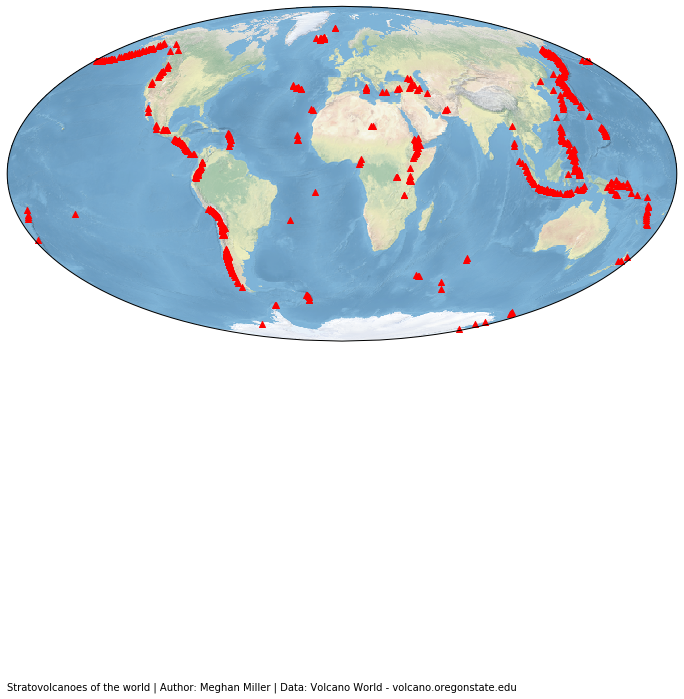

In [25]:
fig=plt.figure(figsize=(12,8))
df = df_volc[df_volc['Type'] == 'Stratovolcano']
#plot_map(df['Longitude'], df['Latitude'], df['Elevation (m)'])
ax = fig.add_subplot(1,1,1, projection=ccrs.Mollweide())
#ax.coastlines()
ax.stock_img()
ax.annotate('Stratovolcanoes of the world | ' + chartinfo, xy=(0, -1.04), xycoords='axes fraction')
ax.scatter(df['Longitude'].array,df['Latitude'].array, color='red', linewidth=1, marker='^', transform=ccrs.Geodetic())
plt.savefig('volcanoes_globe.png')
plt.show()